# Dimentionality Reduction

Dimensionality reduction is a technique used in machine learning and statistics to reduce the number of random variables (features) under consideration by obtaining a set of principal variables. Essentially, it's about finding a way to represent your data using fewer columns or dimensions, while still retaining as much of the important information as possible.

Why do we do it?

* Curse of Dimensionality: In very high-dimensional spaces (many features), data becomes extremely sparse, and distances between points become less meaningful. This makes it harder for machine learning algorithms to find patterns.
* Computational Efficiency: Training models with hundreds or thousands of features can be very slow and require a lot of memory. Reducing dimensions speeds up computation.
* Noise Reduction: Irrelevant or redundant features can introduce noise into the data, making it harder for models to learn. Dimensionality reduction can help filter this out.
* Improved Model Performance: Simpler models (with fewer features) are often less prone to overfitting and can generalize better to new, unseen data.
Visualization: It's impossible to visualize data in more than three dimensions. Reducing data to 2 or 3 dimensions allows for easy plotting and understanding of underlying structures.

# Principal Component Analysis - PCA

PCA, or Principal Component Analysis, is a popular unsupervised dimensionality reduction technique. Its main goal is to transform a dataset with many features into a new dataset with fewer features (called "principal components") while retaining as much of the original data's variance (information) as possible.

Example: Describing Fruit

Imagine you have a dataset of different fruits, and for each fruit, you measure several features:

* Feature 1: Sweetness (e.g., on a scale of 1-10)
* Feature 2: Juiciness (e.g., on a scale of 1-10)
* Feature 3: Weight (in grams)
* Feature 4: Diameter (in cm)
* Feature 5: Skin Color Redness (e.g., on a scale of 0-1)

Now, if you want to understand the main characteristics that differentiate these fruits, or if you want to visualize them in 2D or 3D, 5 dimensions are too many.

How PCA works (simply):

* Find the Direction of Most Variance (PC1): PCA first looks for the direction (a new axis) in your data along which the data points vary the most. This direction is called the first principal component (PC1).
* For our fruit example, PC1 might largely capture a combination of "Sweetness" and "Juiciness." Maybe fruits that are very sweet also tend to be very juicy. So, instead of two separate features, PC1 might represent "Overall Deliciousness."
* Find the Next Best Direction (PC2): PCA then finds another direction (the second principal component, PC2) that is perpendicular (orthogonal) to the first principal component and captures the remaining largest amount of variance.
PC2 might capture something like "Size" (a combination of Weight and Diameter). Or it might capture "Ripeness."
* Continue for More Components: This process continues until you've found as many principal components as there are original features, or until you've captured enough variance for your needs.

The Transformation:

Once PCA has found these principal components (which are essentially new axes), it projects your original data points onto these new axes. So, instead of describing a fruit by its 5 original features, you might now describe it by its "score" on PC1, PC2, and so on.

* A very sweet and juicy apple would have a high score on "Overall Deliciousness" (PC1).
* A small, less juicy lemon would have a low score on "Overall Deliciousness" (PC1) and a low score on "Size" (PC2).

Benefits in this example:

* Dimensionality Reduction: You've potentially reduced 5 dimensions to 2 or 3, making it easier to visualize and analyze.
* Information Compression: The first few principal components often contain most of the "signal" or important information, allowing you to discard less informative dimensions.
* Decoupling Correlated Features: If "Weight" and "Diameter" were highly correlated, PCA creates new components that combine them effectively, removing redundancy.

In essence, PCA is like finding the most efficient and informative angles from which to view your data, allowing you to capture its essence with fewer measurements.

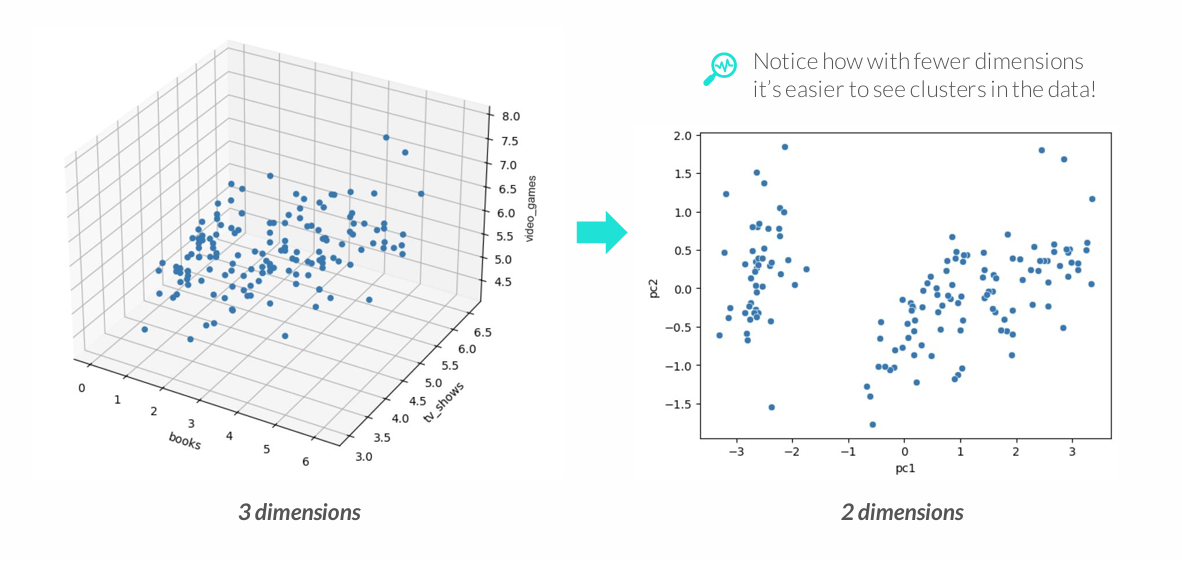

# Notebook Structure

1. Import necessary dependencies
2. Import the dataset and perform initial analysis
3. Data preprocessing and cleaning
4. Implement the PCA model
5. Visualize the PCA components

# 1. Import necessary dependencies

In [1]:
#Import necessary libraries
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# 2. Import the dataset and perform initial analysis

In [3]:
# read in entertainment data

df = pd.read_csv('entertainment.csv')

In [4]:
df.head()

,name,books,tv_shows,video_games
0,Aaliyah,0.5,4.6,4.9
1,Abigail,0.0,4.5,4.8
2,Addison,0.5,4.5,5.0
3,Adeline,3.5,4.5,6.6
4,Alana,2.8,3.8,5.6


In [5]:
df.shape

(150, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         150 non-null    object 
 1   books        150 non-null    float64
 2   tv_shows     150 non-null    float64
 3   video_games  150 non-null    float64
dtypes: float64(3), object(1)
memory usage: 4.8+ KB


In [7]:
df.describe()

,books,tv_shows,video_games
count,150.000000,150.000000,150.000000
mean,2.993333,4.586000,5.843333
std,1.917761,0.645587,0.828066
min,0.000000,3.000000,4.300000
25%,0.800000,4.200000,5.100000
50%,3.200000,4.500000,5.800000
75%,4.500000,4.900000,6.400000
max,6.200000,6.600000,7.900000


### Univariate analysis of the numerical columns

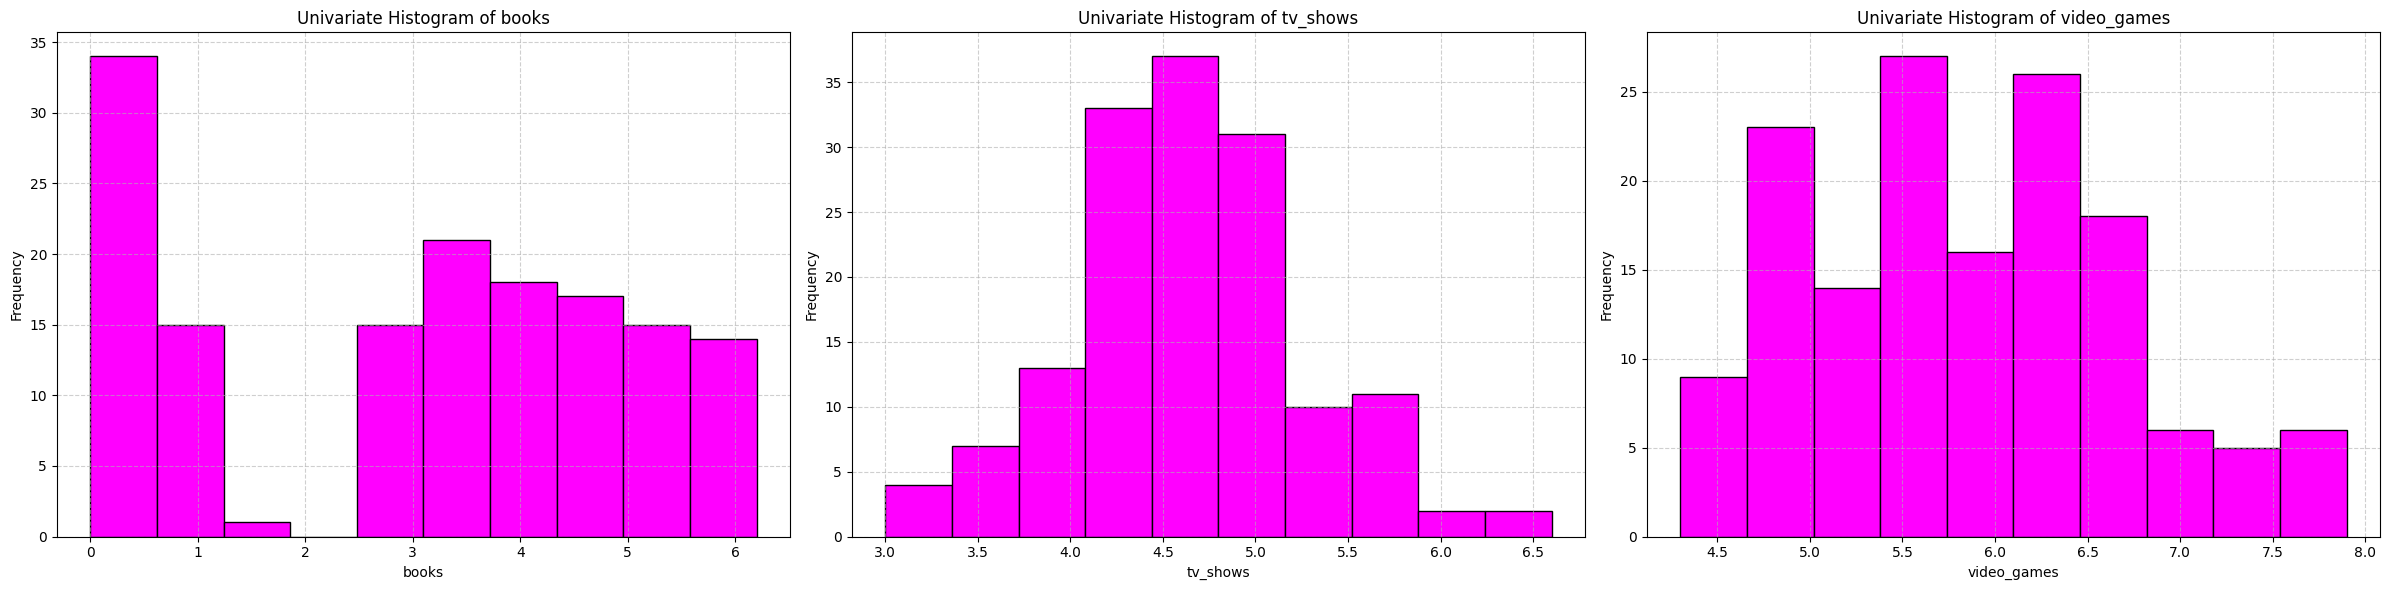

In [10]:
# List of the columns you want to create histograms for

columns_to_plot = ['books', 'tv_shows', 'video_games']

# Create a figure and a set of subplots
num_plots = len(columns_to_plot)
fig, axes = plt.subplots(1, num_plots, figsize=(8 * num_plots, 6))  # Adjust figure width

# Create a histogram for each specified column in its respective subplot
for i, column in enumerate(columns_to_plot):
    ax = axes[i]  # Select the current subplot
    df[column].hist(bins=10,color = 'magenta' , edgecolor='black', ax=ax)  # Use the 'ax' argument
    ax.set_title(f'Univariate Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()  # Adjust layout to prevent overlapping titles/labels
plt.show()

### Summarizing the insights

1. Books:

* The distribution for "books" appears to be right-skewed.
* There's a high frequency of individuals with very low scores (around 0-1).
* The frequency then decreases, with smaller peaks around the 3-4 range and then again around the 5-6 range.
* This suggests that most individuals in this dataset have a low affinity for books based on this metric, with fewer individuals showing higher levels of engagement.

2. TV Shows:

* The distribution for "tv_shows" seems to be approximately normal or slightly left-skewed.
* The highest frequency of individuals falls in the range of around 4.5 to 5.0. There are noticeable frequencies around the 4.0-4.5 range as well.
* The frequencies tend to decrease as the scores move away from this central tendency towards both lower and higher values.
* This suggests a relatively consistent and moderate level of engagement with TV shows across the individuals in the dataset.

3. Video Games:

* The distribution for "video games" appears to be multimodal, with several peaks.
* There are noticeable peaks in frequency around the 4.5-5.0 range, the 5.5-6.0 range, and possibly a smaller one around the 7.0-7.5 range.
* There are also lower frequencies in the ranges between these peaks.
* This indicates that there are distinct groups of individuals with different levels of engagement with video games, rather than a single central tendency.

In summary:

* Engagement with books is generally low, with a few individuals showing higher engagement.
* Engagement with TV shows is more consistent and centered around a moderate level.
* Engagement with video games shows distinct groups with varying levels of affinity, suggesting different preferences within the dataset.

# 3. Data preprocessing and cleaning

### A. Feature selection ( remove the id column )

In [8]:
# remove the id column

data = df.iloc[:, 1:]
data.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


### B. Checking for missing values

In [9]:
data.isnull().sum()

,0
books,0
tv_shows,0
video_games,0


### C. Feature Scaling

In [11]:
# Standardize the remaining columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_ft = scaler.fit_transform(data)
data_scaled = pd.DataFrame(scaler_ft, columns=data.columns)
data_scaled.head()

,books,tv_shows,video_games
0,-1.304483,0.021758,-1.143017
1,-1.566077,-0.133658,-1.264185
2,-1.304483,-0.133658,-1.021849
3,0.265082,-0.133658,0.916837
4,-0.101150,-1.221575,-0.294842


# 4. Implement the PCA model

### A. Build a PCA model with 2 components

In [12]:
# import pca from sklearn

from sklearn.decomposition import PCA

In [13]:
# fit a pca model on the standardized  data with 2 components

pca = PCA(n_components=2)
pca.fit(data_scaled)

PCA(n_components=2)

In [17]:
data_scaled.columns

Index(['books', 'tv_shows', 'video_games'], dtype='object')

In [15]:
# view the explained variance ratio

pca.components_

array([[ 0.68763845, -0.34462013,  0.63905424],
       [ 0.08808454,  0.9132711 ,  0.39771474]])

### Interpretation of the output

The  output is a 2x3 matrix (2 rows, 3 columns).

Rows = Principal Components:

* Row 0: Represents the First Principal Component (PC1).
* Row 1: Represents the Second Principal Component (PC2).
* Since you specified n_components=2, the PCA model has found these two most important components.

Columns = Original Features:

The values in each column correspond to the weights or loadings of the original features for that principal component. Based on data_scaled.columns = Index(['books', 'tv_shows', 'video_games'], dtype='object'), the columns are:

* Column 0: 'books'
* Column 1: 'tv_shows'
* Column 2: 'video_games'

Interpreting the Loadings:

First Principal Component (PC1): [ 0.68763845, -0.34462013, 0.63905424]

* It has a strong positive weight for 'books' (0.6876) and 'video_games' (0.6391).
* It has a negative weight for 'tv_shows' (-0.3446).
* This component seems to capture a contrast between engagement with 'books' and 'video_games' versus 'tv_shows'. For example, if a user scores high on PC1, it means they are likely highly engaged with books and video games, and possibly less so with TV shows. This might represent a "reading/gaming preference" versus "watching preference".

Second Principal Component (PC2): [ 0.08808454, 0.9132711 , 0.39771474]

* It has a very strong positive weight for 'tv_shows' (0.9133).
* It has moderate positive weights for 'books' (0.0881) and 'video_games' (0.3977).
* This component strongly emphasizes 'tv_shows'. A high score on PC2 would indicate a strong preference for TV shows. This might represent a "TV-centric entertainment preference."

In summary, pca.components_ tells you the mathematical composition of your new, lower-dimensional axes. Each row is a new axis (principal component), and the numbers in that row tell you how much each original feature contributes to that new axis. This helps you understand what underlying patterns or combinations of your original features the PCA model has identified as most important for explaining the variance in your data.

In [14]:
# view the explained variance ratio

pca.explained_variance_ratio_

array([0.64759514, 0.30474227])

The output array([0.64759514, 0.30474227]) from pca.explained_variance_ratio_ indicates how much variance each principal component captures from the original data. The first principal component explains approximately 64.76% of the total variance, while the second principal component explains about 30.47%.

In [16]:
# cumulative sum of explained variance

sum(pca.explained_variance_ratio_)

np.float64(0.9523374109098375)

Collectively, these two components explain roughly 95.23% (64.76% + 30.47%) of the variance in your data, which is a very high percentage, suggesting that reducing the dimensionality to just two components effectively preserves most of the meaningful information.

### B. Build a PCA model with 3 components

In [18]:
# fit a pca model on the scaled data

pca3 = PCA(n_components=3)
pca3.fit(data_scaled)

PCA(n_components=3)

In [19]:
# view the explained variance ratio

pca3.components_

array([[ 0.68763845, -0.34462013,  0.63905424],
       [ 0.08808454,  0.9132711 ,  0.39771474],
       [ 0.72069027,  0.21719315, -0.65835603]])

### Interpret the output

The output is a 3x3 matrix (3 rows, 3 columns).

Rows = Principal Components:

* Row 0: Represents the First Principal Component (PC1).
* Row 1: Represents the Second Principal Component (PC2).
* Row 2: Represents the Third Principal Component (PC3).

Columns = Original Features: The columns correspond to your original features:

* Column 0: 'books'
* Column 1: 'tv_shows'
* Column 2: 'video_games'

Interpreting the Loadings:

First Principal Component (PC1): [ 0.68763845, -0.34462013, 0.63905424]

* This component remains the same as when you used 2 components, as PC1 always captures the maximum variance regardless of how many components you extract.
* It shows strong positive loadings for 'books' (0.6876) and 'video_games' (0.6391), and a negative loading for 'tv_shows' (-0.3446). This component likely represents a general "reading/gaming vs. watching" preference.

Second Principal Component (PC2): [ 0.08808454, 0.9132711 , 0.39771474]

* This component also remains the same.
* It has a very strong positive loading for 'tv_shows' (0.9133) and moderate positive loadings for 'books' (0.0881) and 'video_games' (0.3977). This component primarily reflects a "TV-centric entertainment" preference.

Third Principal Component (PC3): [ 0.72069027, 0.21719315, -0.65835603]

* This is the newly extracted component, orthogonal to both PC1 and PC2.
It has a strong positive loading for 'books' (0.7207) and a strong negative loading for 'video_games' (-0.6584). It also has a moderate positive loading for 'tv_shows' (0.2172).
* This component appears to differentiate between users who prefer 'books' versus 'video_games', with a slight leaning towards 'tv_shows' alongside 'books'. This could represent a "reading vs. gaming" axis, where a high score means preference for books and a low score means preference for video games.

Since you had 3 original features, extracting 3 components means you have found as many principal components as your original features. This set of three components effectively represents a rotation of your original data axes, where the new axes are ordered by the amount of variance they explain.

In [21]:
# view the explained variance ratio

pca3.explained_variance_ratio_

array([0.64759514, 0.30474227, 0.04766259])

### Interpretation of the results

It quantifies how much of the total variance in your original 'books', 'tv_shows', and 'video_games' dataset is explained by each of the three principal components.

* The first principal component (PC1) accounts for approximately 64.76% of the total variance, making it the most significant dimension.
* The second principal component (PC2) explains an additional 30.47% of the variance.
* The third principal component (PC3) captures the remaining 4.77% of the variance.

In [22]:
# cumulative sum of explained variance

sum(pca3.explained_variance_ratio_)

np.float64(0.9999999999999999)

All three components combined explain 100% of the total variance in your original three-dimensional dataset (64.76% + 30.47% + 4.77% ≈ 100%). This is expected because with n_components=3 and 3 original features, PCA simply rotates the axes of your data, transforming it into a new coordinate system where the axes are ordered by how much variance they explain. This confirms that no information was lost, as all original dimensions are represented by the new principal components.

# 5. Visualize the PCA components

### A. Transform the data in lower dimention ( 2 dimention in our case )

The code snippet transforms our data_scaled (ikely containing 'books', 'tv_shows', and 'video_games' preferences) from its original 3 dimensions into a new 2-dimensional representation using the fitted pca model. The pca.transform(data_scaled) method projects each data point onto the two principal components identified earlier. The resulting transformed data, which now has only two columns (representing 'pc1' and 'pc2'), is then converted into a Pandas DataFrame named df_transformed for easy viewing and further analysis.

In [23]:
# view the transformed data

df_transformed = pd.DataFrame(pca.transform(data_scaled),
                                columns=['pc1', 'pc2'])
df_transformed.head()

,pc1,pc2
0,-1.634961,-0.549628
1,-1.838716,-0.762798
2,-1.503968,-0.643376
3,0.814250,0.265923
4,0.163005,-1.241802


### B. Visualize the components in a scatter plot

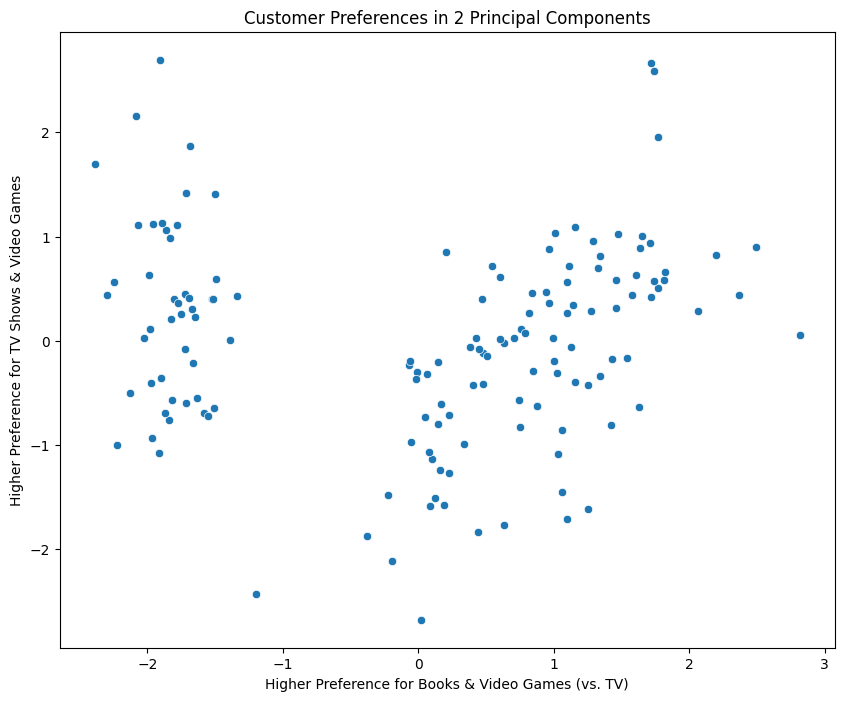

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes with a specified size
plt.figure(figsize=(10, 8))

sns.scatterplot(x='pc1', y='pc2', data=df_transformed)

# Using your current labels as they are quite descriptive
plt.xlabel('Higher Preference for Books & Video Games (vs. TV)')
plt.ylabel('Higher Preference for TV Shows & Video Games')

plt.title('Customer Preferences in 2 Principal Components')
plt.show()

### Interpretation of the Plot:

The scatter plot shows distinct groupings or clusters of customers based on their combined preferences:

* Left Side (Lower PC1 values): Customers on the left half of the plot generally show a lower preference for books and video games compared to TV.
    * Top-Left Quadrant: These customers likely have a higher preference for TV shows and video games (high PC2) but a lower preference for books and video games (low PC1). They might be primarily "TV watchers" who also enjoy some gaming.
    * Bottom-Left Quadrant: These customers show lower engagement across the board, with lower preferences for both categories represented by PC1 and PC2.
* Right Side (Higher PC1 values): Customers on the right half of the plot generally show a higher preference for books and video games.
    * Top-Right Quadrant: These customers have high preferences for both groups of entertainment. They likely enjoy books, video games, and TV shows.
    * Bottom-Right Quadrant: These customers exhibit a strong preference for books and video games (high PC1) but a lower preference for TV shows (low PC2). They might be "readers and gamers" who are less interested in TV.
    
Overall, the plot effectively visualizes the underlying preference patterns among your customers in a simplified 2D space, allowing you to quickly identify different segments of your customer base based on their entertainment consumption habits. The density of points in certain areas suggests groups of customers with similar preference profiles.